# Results on ACIC 2016

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

In [2]:
df_nsm = pd.read_csv('../outputs/sweep_outputs/acic2016_stability.csv')
df_other = pd.read_csv('../outputs/matching_benchmark_outputs/acic2016_stability.csv')
df_other = df_other[[col for col in df_other.columns if 'ps_gt' not in col]]

# Put columns from all matrices in the right format and select the appropriate ones
df_nsm = df_nsm[['{}_matching_metric/{}_{}'.format(dataset, model, metric) for (dataset, dataset_2) in zip(['insample','holdout'],['in','out']) for model in ['balancing','propensity'] for metric in ['error_att','linear_mmd_att']]\
                  + ['{}_loss_metric/{}'.format(dataset, metric) for (dataset, dataset_2) in zip(['insample','holdout'],['in','out']) for metric in ['calibration_error']]]
df_nsm = df_nsm.rename(columns=dict(**{'{}_matching_metric/{}_{}'.format(dataset, model, metric): '{}_{}_{}'.format(model, metric, dataset_2) for (dataset, dataset_2) in zip(['insample','holdout'],['in','out']) for model in ['balancing','propensity'] for metric in ['error_att','linear_mmd_att']}, **{'{}_loss_metric/{}'.format(dataset, metric): 'propensity_{}_{}'.format(metric, dataset_2) for (dataset, dataset_2) in zip(['insample','holdout'],['in','out']) for metric in ['calibration_error']}))
df_nsm = df_nsm[[col for col in df_nsm.columns if col[-3:] in ['_in','out'] and ('error_att' in col or 'linear_mmd_att' in col or 'calibration_error' in col)]]

df_other = df_other[[col for col in df_other.columns if ('error_att' in col or 'linear_mmd_att' in col or 'calibration_error' in col) and 'ipw' not in col and 'ground truth' not in col]]


/home/oscar/miniconda3/envs/cameraready/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,7,10,15,23,31,33,36,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,26

In [3]:
# Proper naming of models
atlas = {
    'balancing': 'NN Layer 1 (ours)',
    'propensity': 'NN PS (ours)',
    
    'random': 'Random',
    'x_eucl': 'X',
    'propensity_x': 'LogReg PS',
    'x_pca_eucl': 'PCA',
    'propensity_x_pca': 'PCA + LogReg PS',
    'plain_vae': 'Plain VAE',
    'propensity_plain_vae': 'Plain VAE + LogReg PS',
    'no matching': 'No Matching'
    
}

In [4]:
# Print results for ATT errors

rename = (lambda s: s.replace('_in','').replace('_out','').replace('_error_att','').replace('_linear_mmd_att','')) 

show_mvae = (df_nsm[[col for col in df_nsm.columns if 'error_att_in' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_nsm[[col for col in df_nsm.columns if 'error_att_in' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename)\
+ ' & ' + df_nsm[[col for col in df_nsm.columns if 'error_att_out' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_nsm[[col for col in df_nsm.columns if 'error_att_out' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename))

show_match = (df_other[[col for col in df_other.columns if 'error_att_in' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_other[[col for col in df_other.columns if 'error_att_in' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename)\
+ ' & ' + df_other[[col for col in df_other.columns if 'error_att_out' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_other[[col for col in df_other.columns if 'error_att_out' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename))

show = pd.concat([show_mvae, show_match])

show = show.rename(atlas)
show = show.loc[show.index.intersection(atlas.values())]
show = (show.index + ' & ' + show + r' \\')


for el in show.values:
    print(el)

NN Layer 1 (ours) & 0.707$\pm$0.012 & 0.918$\pm$0.018 \\
NN PS (ours) & 0.735$\pm$0.012 & 1.008$\pm$0.019 \\
X & 0.848$\pm$0.018 & 0.99$\pm$0.019 \\
Random & 1.209$\pm$0.019 & 1.301$\pm$0.023 \\
LogReg PS & 0.678$\pm$0.012 & 1.036$\pm$0.018 \\
PCA & 0.927$\pm$0.016 & 1.007$\pm$0.02 \\
PCA + LogReg PS & 0.962$\pm$0.016 & 1.097$\pm$0.021 \\


In [5]:
# Print results for imbalances

rename = (lambda s: s.replace('_in','').replace('_out','').replace('_linear_mmd_att','').replace('_linear_mmd_att',''))
 

show_mvae = (df_nsm[[col for col in df_nsm.columns if 'linear_mmd_att_in' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_nsm[[col for col in df_nsm.columns if 'linear_mmd_att_in' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename)\
+ ' & ' + df_nsm[[col for col in df_nsm.columns if 'linear_mmd_att_out' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_nsm[[col for col in df_nsm.columns if 'linear_mmd_att_out' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename))

show_match = (df_other[[col for col in df_other.columns if 'linear_mmd_att_in' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_other[[col for col in df_other.columns if 'linear_mmd_att_in' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename)\
+ ' & ' + df_other[[col for col in df_other.columns if 'linear_mmd_att_out' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_other[[col for col in df_other.columns if 'linear_mmd_att_out' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename))

show = pd.concat([show_mvae, show_match])

show = show.rename(atlas)
show = show.loc[show.index.intersection(atlas.values())]
show = (show.index + ' & ' + show + r' \\')


for el in show.values:
    print(el)

NN Layer 1 (ours) & 0.107$\pm$0.001 & 0.422$\pm$0.003 \\
NN PS (ours) & 0.105$\pm$0.001 & 0.498$\pm$0.004 \\
X & 0.438$\pm$0.002 & 0.739$\pm$0.004 \\
Random & 0.232$\pm$0.003 & 0.558$\pm$0.006 \\
LogReg PS & 0.056$\pm$0.001 & 0.511$\pm$0.004 \\
PCA & 0.117$\pm$0.001 & 0.342$\pm$0.003 \\
PCA + LogReg PS & 0.134$\pm$0.001 & 0.488$\pm$0.004 \\
No Matching & 0.192$\pm$0.003 & 0.396$\pm$0.006 \\


In [6]:
# Print results for calibration errors

rename = (lambda s: s.replace('_in','').replace('_out','').replace('_calibration_error','').replace('_calibration_error',''))
 

show_mvae = (df_nsm[[col for col in df_nsm.columns if 'calibration_error_in' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_nsm[[col for col in df_nsm.columns if 'calibration_error_in' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename)\
+ ' & ' + df_nsm[[col for col in df_nsm.columns if 'calibration_error_out' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_nsm[[col for col in df_nsm.columns if 'calibration_error_out' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename))

show_match = (df_other[[col for col in df_other.columns if 'calibration_error_in' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_other[[col for col in df_other.columns if 'calibration_error_in' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename)\
+ ' & ' + df_other[[col for col in df_other.columns if 'calibration_error_out' in col]].mean().round(3).astype(str).rename(rename)\
+ r'$\pm$' + (df_other[[col for col in df_other.columns if 'calibration_error_out' in col]].std() / np.sqrt(1000)).round(3).astype(str).rename(rename))

show = pd.concat([show_mvae, show_match])

show = show.rename(atlas)
show = show.loc[show.index.intersection(atlas.values())]
show = (show.index + ' & ' + show + r' \\')


for el in show.values:
    print(el)

NN PS (ours) & 0.055$\pm$0.0 & 0.055$\pm$0.0 \\
LogReg PS & 0.067$\pm$0.0 & 0.069$\pm$0.0 \\
PCA + LogReg PS & 0.058$\pm$0.001 & 0.058$\pm$0.001 \\


<ipython-input-7-a82e74303012>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['experiment'] = df_all.index
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<ipython-input-7-a82e74303012>:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<ipython-input-7-a82e74303012>:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<ipython-input-7-a82e74303012>:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


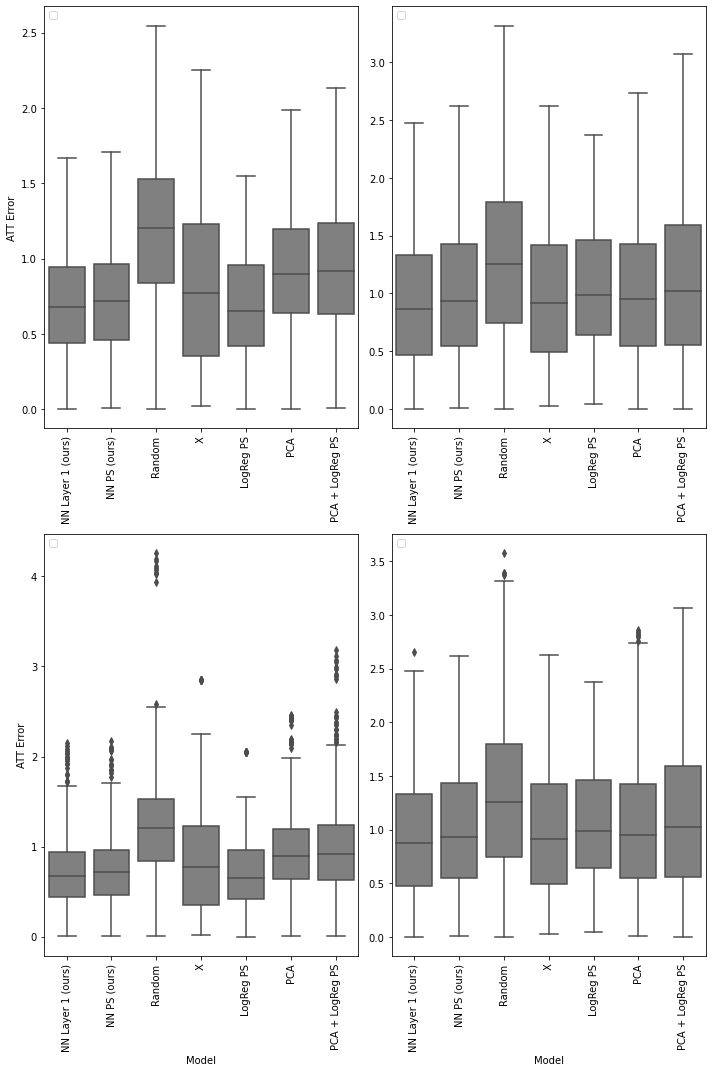

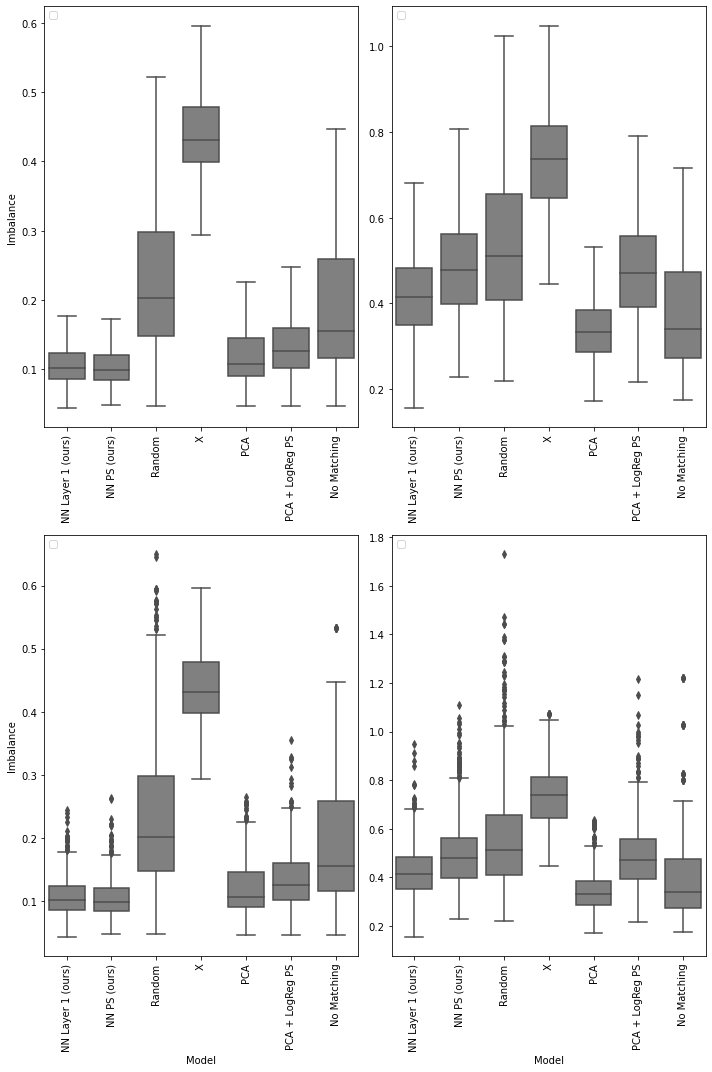

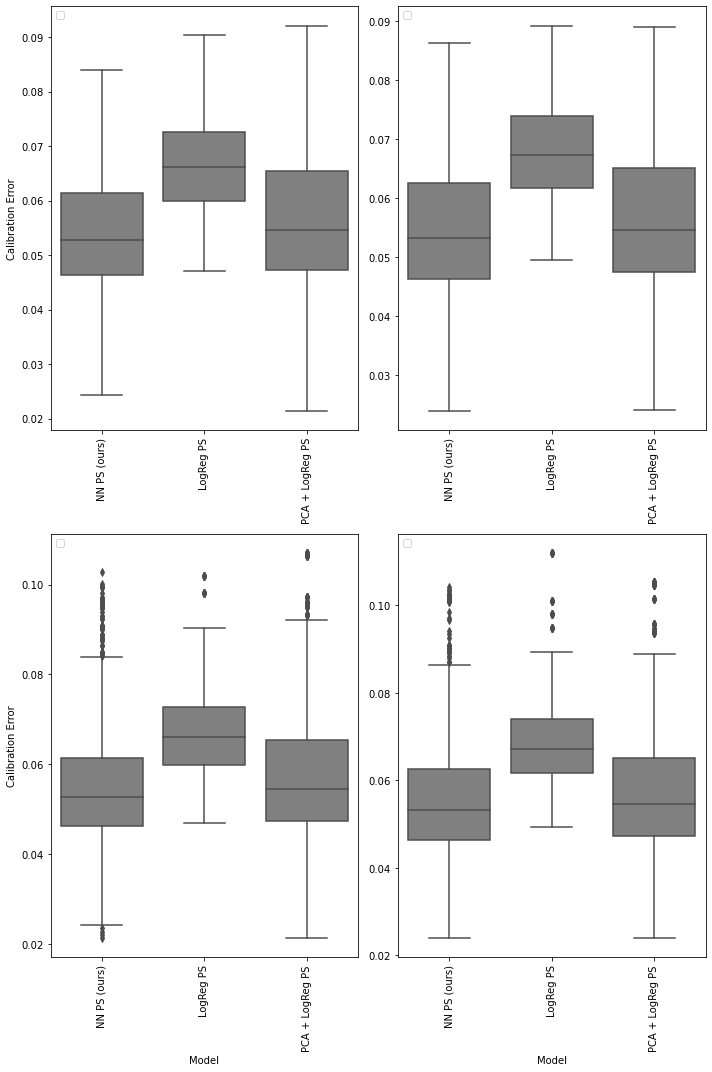

In [7]:
# Boxplots on all results

# Show outliers or not? CHANGE this parameter
SHOW_OUTLIERS=True

import pandas
import matplotlib.pyplot as plt
import seaborn as sns

df_all = pd.concat([df_nsm, df_other], axis='columns')
results = df_all[[col for col in df_all.columns if col != 'propensity_x_linear_mmd_att_in' and col != 'propensity_x_linear_mmd_att_out']]
results['experiment'] = df_all.index

# do wrangling to required format
results_error_att = results[[col for col in results.columns if 'error_att' in col or col == 'experiment']].melt(id_vars=['experiment'], var_name='model', value_name='error_att')
results_linear_mmd = results[[col for col in results.columns if 'linear_mmd_att' in col or col == 'experiment']].melt(id_vars=['experiment'], var_name='model', value_name='linear_mmd_att')
results_calibration_error = results[[col for col in results.columns if 'calibration_error' in col or col == 'experiment']].melt(id_vars=['experiment'], var_name='model', value_name='calibration_error')


results_error_att.loc[results_error_att['model'].str.contains("_in"), 'dataset'] = 'In-Sample'
results_error_att.loc[results_error_att['model'].str.contains("_out"), 'dataset'] = 'Hold-out'

results_linear_mmd.loc[results_linear_mmd['model'].str.contains("_in"), 'dataset'] = 'In-Sample'
results_linear_mmd.loc[results_linear_mmd['model'].str.contains("_out"), 'dataset'] = 'Hold-out'

results_calibration_error.loc[results_calibration_error['model'].str.contains("_in"), 'dataset'] = 'In-Sample'
results_calibration_error.loc[results_calibration_error['model'].str.contains("_out"), 'dataset'] = 'Hold-out'

# remove _in and _out in name
results_error_att.loc[results_error_att['model'].str.contains("_in"), 'model'] = results_error_att.loc[results_error_att['model'].str.contains("_in"), 'model'].str.slice(stop=-3)
results_error_att.loc[results_error_att['model'].str.contains("_out"), 'model'] = results_error_att.loc[results_error_att['model'].str.contains("_out"), 'model'].str.slice(stop=-4)

results_linear_mmd.loc[results_linear_mmd['model'].str.contains("_in"), 'model'] = results_linear_mmd.loc[results_linear_mmd['model'].str.contains("_in"), 'model'].str.slice(stop=-3)
results_linear_mmd.loc[results_linear_mmd['model'].str.contains("_out"), 'model'] = results_linear_mmd.loc[results_linear_mmd['model'].str.contains("_out"), 'model'].str.slice(stop=-4)

results_calibration_error.loc[results_calibration_error['model'].str.contains("_in"), 'model'] = results_calibration_error.loc[results_calibration_error['model'].str.contains("_in"), 'model'].str.slice(stop=-3)
results_calibration_error.loc[results_calibration_error['model'].str.contains("_out"), 'model'] = results_calibration_error.loc[results_calibration_error['model'].str.contains("_out"), 'model'].str.slice(stop=-4)



results_error_att = results_error_att.rename(columns={'error_att': 'ATT Error', 'linear_mmd_att': 'Imbalance', 'model': 'Model', 'dataset': 'Dataset'})
results_error_att['Model'] = results_error_att['Model'].str.replace('_error_att', '').apply(lambda s: atlas[s])
results_error_att = results_error_att[~results_error_att['Model'].str.contains('No Matching')]
results_linear_mmd = results_linear_mmd.rename(columns={'_error_att': 'ATT Error', 'linear_mmd_att': 'Imbalance', 'model': 'Model', 'dataset': 'Dataset'})
results_linear_mmd['Model'] = results_linear_mmd['Model'].str.replace('_linear_mmd_att', '').apply(lambda s: atlas[s])
results_error_att.index = results_error_att.Model
results_error_att = results_error_att.loc[pd.Index(atlas.values()).intersection(results_error_att.index)]
results_linear_mmd.index = results_linear_mmd.Model
results_linear_mmd = results_linear_mmd.loc[pd.Index(atlas.values()).intersection(results_linear_mmd.index)]
results_calibration_error = results_calibration_error.rename(columns={'calibration_error': 'Calibration Error', 'model': 'Model', 'dataset': 'Dataset'})
results_calibration_error['Model'] = results_calibration_error['Model'].str.replace('_calibration_error', '').apply(lambda s: atlas[s])
results_calibration_error.index = results_calibration_error.Model
results_calibration_error = results_calibration_error.loc[pd.Index(atlas.values()).intersection(results_calibration_error.index)]
results_calibration_error.index = results_calibration_error.Model
results_calibration_error = results_calibration_error.loc[pd.Index(atlas.values()).intersection(results_calibration_error.index)]

for results,y in zip([results_error_att,results_linear_mmd,results_calibration_error],['ATT Error','Imbalance','Calibration Error']):
    plt.rc('figure', figsize=(10,15))
    fig, axs = plt.subplots(2,2)
    for i,showfliers in enumerate([False,True]):
        for j,res in enumerate([results[results.Dataset == 'In-Sample'], results[results.Dataset == 'Hold-out']]):
            sns.boxplot(x='Model', y=y, data=res, showfliers=showfliers, ax=axs[i,j], color='grey')#, hue='Dataset')
            plt.setp(axs[i,j])
            if i==0:
                axs[i,j].set_xlabel(None)
            if j>0:
                axs[i,j].set_ylabel(None)
            axs[i,j].legend(loc='upper left')
            axs[i,j].set_xticklabels(axs[i,j].get_xticklabels(),rotation=90, size=10)
    fig.tight_layout()
    fig.show()